In [1]:
print("Data Science is the best")

Data Science is the best


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('mock_data.tsv',sep='\t')
position = df["End Position(Endgame)"]
df["Auto Points Scored"] = df["Classifier Scored(Auto)"]*3 + df["Overflow Scored(Auto)"]*1 + df["Pattern Correct(Auto)"]*2
df["Teleop Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Depot Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Endgame Points Scored"] = np.where(position == "No", 0, np.where(position == "P", 5, np.where(position == "Sc", 10, np.where(position == "Hh", 20, 0))))
df["Total Points Scored"] = df["Auto Points Scored"] + df["Teleop Points Scored"] + df["Endgame Points Scored"]
df["Shooting Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Classifier Points Scored(Auto)"] = df["Classifier Scored(Auto)"]*3
df["Overflow Points Scored(Auto)"] = df["Overflow Scored(Auto)"]*1
print(df)

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
4                dt             2    R1         3504                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifie

In [3]:
df.columns

Index(['Scouter Initials', 'Match Number', 'Robot', 'Team Number',
       'Starting Position', 'No Show', 'Moved?', 'Timer',
       'Classifier Scored(Auto)', 'Overflow Scored(Auto)',
       'Pattern Correct(Auto)', 'Auto Foul', 'Pickup Location(Teleop)',
       'Classifier Scored(Teleop)', 'Overflow Scored(Teleop)',
       'Depot Scored(Teleop)', 'Pattern Correct(Teleop)',
       'Crossed Field/Played Defense?(Teleop)',
       'Was Robot Defended by Other Alliance?(Teleop)',
       'End Position(Endgame)', 'Died?(Postmatch)',
       'Tipped/Fell Over?(Postmatch)', 'Offense Skill(Postmatch)',
       'Defensive Skill(Postmatch)', 'Yellow/Red Card(Postmatch)',
       'Comments(Postmatch)', 'Auto Points Scored', 'Teleop Points Scored',
       'Endgame Points Scored', 'Total Points Scored',
       'Shooting Points Scored', 'Classifier Points Scored(Auto)',
       'Overflow Points Scored(Auto)'],
      dtype='object')

In [4]:
all_teams = [3333, 6666, 11111, 4444]
new_df = df.loc[df["Team Number"].isin(all_teams)]
print(new_df)

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifier Scored(Auto)  Overflow Scored(Auto)  \
0     False    True      0       

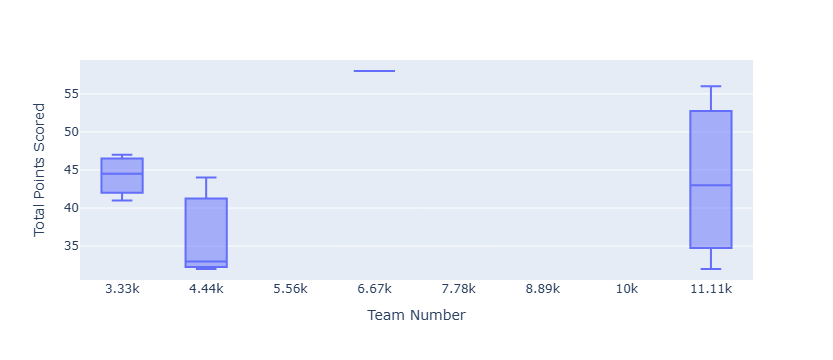

In [5]:
fig = px.box(new_df, x="Team Number", y= "Total Points Scored")
fig.show()

In [6]:
new_df

,Scouter Initials,Match Number,Robot,Team Number,Starting Position,No Show,Moved?,Timer,Classifier Scored(Auto),Overflow Scored(Auto),...,Defensive Skill(Postmatch),Yellow/Red Card(Postmatch),Comments(Postmatch),Auto Points Scored,Teleop Points Scored,Endgame Points Scored,Total Points Scored,Shooting Points Scored,Classifier Points Scored(Auto),Overflow Points Scored(Auto)
0,abc,1,R1,3333,R2,False,True,0,9,1,...,1,No Card,NaN,32,1,10,43,0,27,1
1,dt,1,R2,6666,R2,False,True,0,10,0,...,0,No Card,NaN,30,8,20,58,6,30,0
2,dt,1,B1,11111,R1,False,True,0,5,0,...,3,No Card,NaN,15,12,5,32,11,15,0
3,fu,1,B2,4444,R2,False,True,0,8,2,...,1,No Card,NaN,34,0,10,44,0,24,2
5,dt,2,R2,11111,R1,False,True,0,8,1,...,0,No Card,NaN,31,2,10,43,1,24,1
6,ty,2,B1,3333,R1,False,True,0,6,3,...,3,Yellow,NaN,25,12,10,47,9,18,3
7,hi,2,B2,4444,R1,False,True,0,7,4,...,1,No Card,NaN,25,2,5,32,2,21,4
8,dt,3,R1,3333,R1,False,True,0,9,2,...,0,No Card,NaN,31,0,10,41,0,27,2
9,dt,3,R2,11111,R2,False,False,0,11,1,...,2,No Card,NaN,38,13,5,56,10,33,1
10,hi,3,B1,3333,R2,False,True,0,6,3,...,0,No Card,NaN,29,12,5,46,10,18,3


In [7]:
avg=new_df.groupby("Team Number").mean(numeric_only=True)
avg

,Match Number,No Show,Moved?,Timer,Classifier Scored(Auto),Overflow Scored(Auto),Pattern Correct(Auto),Auto Foul,Pickup Location(Teleop),Classifier Scored(Teleop),...,Offense Skill(Postmatch),Defensive Skill(Postmatch),Comments(Postmatch),Auto Points Scored,Teleop Points Scored,Endgame Points Scored,Total Points Scored,Shooting Points Scored,Classifier Points Scored(Auto),Overflow Points Scored(Auto)
Team Number,,,,,,,,,,,,,,,,,,,,,
3333,2.25,0.0,1.000000,0.0,7.500000,2.250000,2.250000,0.0,6.000000,0.750000,...,3.500000,1.000000,NaN,29.25,6.250000,8.750000,44.250000,4.750000,22.5,2.250000
4444,2.00,0.0,1.000000,0.0,7.333333,3.666667,1.666667,1.0,6.000000,0.000000,...,3.666667,0.666667,NaN,29.00,0.666667,6.666667,36.333333,0.666667,22.0,3.666667
6666,1.00,0.0,1.000000,0.0,10.000000,0.000000,0.000000,0.0,12.000000,1.000000,...,3.000000,0.000000,NaN,30.00,8.000000,20.000000,58.000000,6.000000,30.0,0.000000
11111,2.00,0.0,0.666667,0.0,8.000000,0.666667,1.666667,0.0,11.333333,1.333333,...,2.666667,1.666667,NaN,28.00,9.000000,6.666667,43.666667,7.333333,24.0,0.666667


In [8]:
fig = px.scatter(avg, y= "Shooting Points Scored")
fig.show()

In [9]:
fig = px.scatter(avg, y= "Depot Scored(Teleop)")
fig.show()

In [10]:
fig = px.bar(avg, y= ["Classifier Scored(Auto)", "Overflow Scored(Auto)"])
fig.show()

Index(['Match Number', 'No Show', 'Moved?', 'Timer', 'Classifier Scored(Auto)',
       'Overflow Scored(Auto)', 'Pattern Correct(Auto)', 'Auto Foul',
       'Pickup Location(Teleop)', 'Classifier Scored(Teleop)',
       'Overflow Scored(Teleop)', 'Depot Scored(Teleop)',
       'Pattern Correct(Teleop)', 'Crossed Field/Played Defense?(Teleop)',
       'Was Robot Defended by Other Alliance?(Teleop)', 'Died?(Postmatch)',
       'Tipped/Fell Over?(Postmatch)', 'Offense Skill(Postmatch)',
       'Defensive Skill(Postmatch)', 'Comments(Postmatch)',
       'Auto Points Scored', 'Teleop Points Scored', 'Endgame Points Scored',
       'Total Points Scored', 'Shooting Points Scored',
       'Classifier Points Scored(Auto)', 'Overflow Points Scored(Auto)'],
      dtype='object')


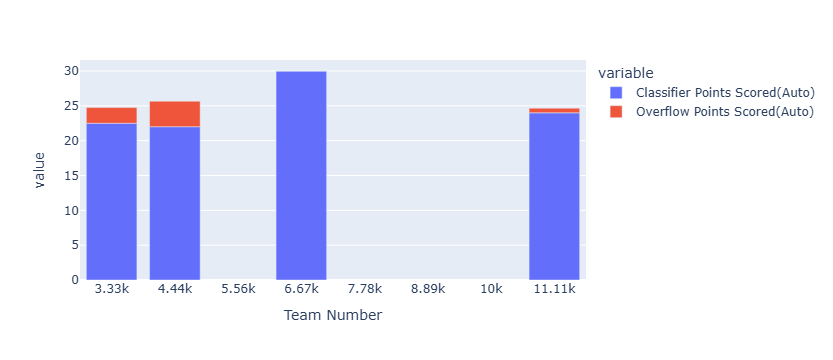

In [16]:
fig = px.bar(avg, y=["Classifier Points Scored(Auto)", "Overflow Points Scored(Auto)"])
fig.show()